# Homework Assignment 2

## Section 1: Admissions Dataset

In [1]:
#First round of imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import Imputer, OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score;


In [2]:
#data
admissions = pd.read_csv("../data/dataset-ucla-admissions.csv")

admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [3]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


**Question 1:**

What is the target/outcome variable? What are the features? Which features are continous or categorical? What is the null accuracy? If there are categorical variables, turn them into dummy variables and concatenate them with the data.

In [4]:
#target variable is 'admit'

In [5]:
#the features are:
#'gre' score - continuous
#'gpa' - continuous
#'prestige' - continuous

In [6]:
#null accuracy
admissions.admit.value_counts(normalize=True)*100

0    68.25
1    31.75
Name: admit, dtype: float64

In [7]:
admissions.prestige.value_counts()

2.0    150
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64

**Question 2:**

What do you think is the goal of using machine learning with this dataset.

In [8]:
#Predict who will be accepted into college.

**Question 3:** Make a scatter plot of gpa vs gre color-encoded using the admit feature. What does this graph tell you?

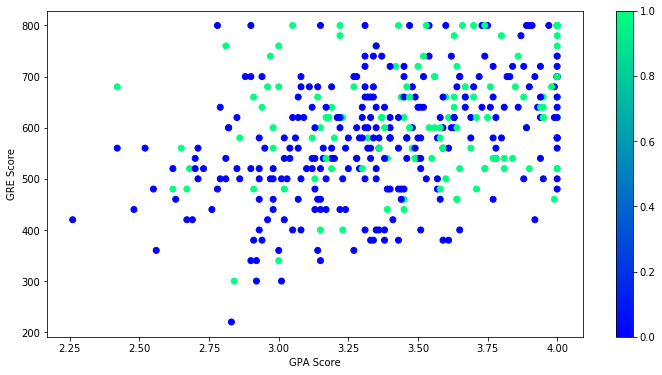

In [9]:
plt.figure(figsize=(12,6))
plt.scatter(
    admissions.gpa, 
    admissions.gre,
    c = admissions.admit,
    cmap= "winter")
plt.xlabel("GPA Score")
plt.ylabel("GRE Score")
plt.colorbar()

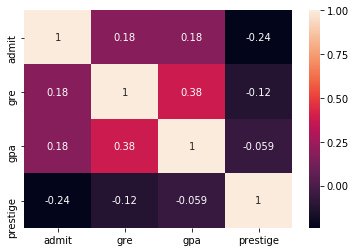

In [10]:
sns.heatmap(admissions.corr(), annot=True)

In [11]:
#there is some positive correlation between a higher GRE score & higher GPA with admission 

**Question 4:** 

    - 1. Make a train test split using a quarter of the data for testing.
    - 2. Fit a Logistic Regression model on the training data.
    - 3. Evaluate the model on both the training and testing datasets using accuracy score.
    - 4. Whats difference in the accuracy score of training and testing datasets? Is this evidence of overfitting?

In [12]:
admissions.dropna(axis=0, inplace=True)

admissions.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [13]:
X = admissions.drop("admit", axis = 1)
y = admissions.admit

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state = 31)

lr = LogisticRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_train)
preds = lr.predict(X_test)

training_score = accuracy_score(y_train, pred)
testing_score = accuracy_score(y_test, preds)

In [14]:
print(training_score * 100)

69.0235690236


In [15]:
print(testing_score * 100)

73.0


In [16]:
mean_cv_score = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='accuracy').mean()

In [17]:
print(mean_cv_score *100)

71.0360993905


In [18]:
#Cross validation shows that there was mild overfitting in the testing score

**Question 5:** Use grid search to determine the K-Neigbors values in a KNN model trained on this dataset and to determine the best max_depth value in a Decision Tree model as well. Which model is better? Use roc_auc as your evaluation metric.

In [19]:
neighbors_range = list(range(1,21))

param_grid_knn = {}

param_grid_knn["n_neighbors"] = neighbors_range

param_grid_knn

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20]}

In [20]:
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5,
                       scoring="accuracy")

grid_knn.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [21]:
grid_knn.grid_scores_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.62469, std: 0.04768, params: {'n_neighbors': 1},
 mean: 0.66751, std: 0.03841, params: {'n_neighbors': 2},
 mean: 0.64987, std: 0.05813, params: {'n_neighbors': 3},
 mean: 0.67758, std: 0.04362, params: {'n_neighbors': 4},
 mean: 0.67506, std: 0.04532, params: {'n_neighbors': 5},
 mean: 0.69270, std: 0.03154, params: {'n_neighbors': 6},
 mean: 0.67758, std: 0.04682, params: {'n_neighbors': 7},
 mean: 0.68766, std: 0.04519, params: {'n_neighbors': 8},
 mean: 0.69270, std: 0.05617, params: {'n_neighbors': 9},
 mean: 0.68514, std: 0.03983, params: {'n_neighbors': 10},
 mean: 0.71033, std: 0.05162, params: {'n_neighbors': 11},
 mean: 0.69521, std: 0.03412, params: {'n_neighbors': 12},
 mean: 0.68766, std: 0.04163, params: {'n_neighbors': 13},
 mean: 0.68514, std: 0.02968, params: {'n_neighbors': 14},
 mean: 0.68010, std: 0.04002, params: {'n_neighbors': 15},
 mean: 0.67758, std: 0.03508, params: {'n_neighbors': 16},
 mean: 0.67506, std: 0.03888, params: {'n_neighbors': 17},
 mean:

In [22]:
grid_knn.best_score_

0.7103274559193955

In [23]:
grid_knn.best_params_

{'n_neighbors': 11}

In [24]:
cross_val_score(KNeighborsClassifier(), X, y, cv =5, scoring = "roc_auc").mean()

0.62417871017871018

In [25]:
depths_range = list(range(2, 21))
param_grid_dt = {}
param_grid_dt["max_depth"] = depths_range
param_grid_dt

{'max_depth': [2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20]}

In [26]:
grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt,
                      cv=5,scoring="accuracy")

grid_dt.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [27]:
print(grid_dt.best_score_)
print(grid_dt.best_params_)

0.715365239295
{'max_depth': 3}


In [28]:
cross_val_score(DecisionTreeClassifier(), X, y, cv =5, scoring = "roc_auc").mean()

0.55045169645169645

In [29]:
#The Decision Trees model with a max depth of 3 is only slightly more accurate than the KNN model using 11 nearest neighbors.
#But KNN has a higher roc_auc score, wihch suggests that the KNN model is better at predicting true positives and false positives.



**Question 6:** If you work in an admissions department, would you rather have a model that minimizes false negatives or minimizes false positives? Why?

In [30]:
#Based on the sheer number of applicants that apply to university, I would want to use a stricter model that chooses
#the best applicants. So I would choose a model that minimizes false positives.



**Question 7:** Using the Logistic Regression from Question 4, what is the probability of admission of the following prospective students:

    - Student 1: GRE = 560, GPA = 3.6, Prestige = 2.
    - Student 2: GRE = 750, GPA = 3.8, Prestige = 4.
    - Student 3: GRE = 660, GPA = 3.1, Prestige = 1.

In [31]:
#Input 
a = [[560, 3.6, 2.]]
b = [[750, 3.8, 4.]]
c = [[660, 3.1, 1.]]

#Make prediction 
print(lr.predict_proba(a))
print(lr.predict_proba(b))
print(lr.predict_proba(c))

print(lr.predict(a))
print(lr.predict(b))
print(lr.predict(c))

[[ 0.61847851  0.38152149]]
[[ 0.79212796  0.20787204]]
[[ 0.42267916  0.57732084]]
[0]
[0]
[1]


## Section 2: Mystery Dataset

In this section you will work with a "mystery" supervised classification dataset, in that you have no context to work with — the names of the features come from San Francisco neighborhoods but aren't related to anything to San Francisco.

<br>

In this section I want to devise the best possible model with the fewest number of features. Some of the features are informative, while others are junk, your task is to find the good ones while dropping the bad ones.

<br>

I want you to thoroughly test at least three algorithms in order to find the best one with the best parameters.

In [32]:
data = pd.read_csv("../data/homework_2_data.csv", index_col=[0])

data.head()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
0,-3.126509,7.807749,0.959736,-2.248569,4.557675,1.110156,0.617296,0.356864,0.860267,-0.395962,-1.144975,-1.805742,1.498388,2.157730,1
1,0.941629,2.935495,-0.584966,-0.880963,-1.262072,0.120989,3.970787,2.509629,1.400017,0.574335,-3.389879,-0.898020,0.512079,4.340694,1
2,-0.724688,4.192606,-1.139602,0.856972,0.906893,-2.799484,0.584498,3.468955,1.011336,0.839612,-1.384781,-0.241726,1.502255,-1.539356,1
3,-2.641034,6.963189,0.962412,-0.838858,1.549620,-2.335671,-0.838585,1.924333,2.794306,-0.421610,-1.273275,0.833424,2.268457,-0.004678,0
4,1.259116,4.741797,1.084332,0.186698,4.794145,-1.093006,2.161358,3.264167,-0.060052,1.154145,-2.030773,-1.442986,0.588193,0.533464,1


In [33]:
X = data.drop("target", axis = 1)
y = data["target"]

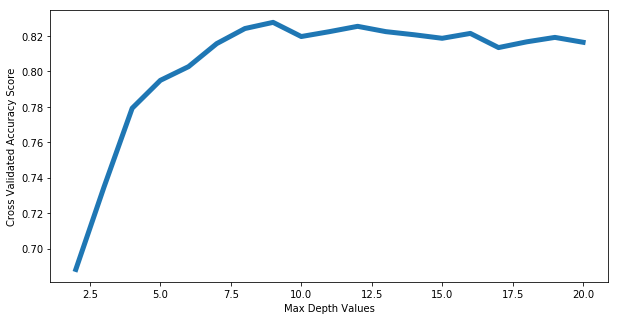

In [34]:
#Decision Tree, finding max_depth

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

depths = range(2,21)

cv_scores = []

for depth in depths:
    cv_score = cross_val_score(DecisionTreeClassifier(max_depth=depth),
                               X, 
                               y, 
                               cv=5, 
                               scoring="accuracy"
                              ).mean()
    cv_scores.append(cv_score)
    
plt.figure(figsize=(10,5))    
plt.plot(depths, cv_scores, linewidth = 5)
plt.xlabel("Max Depth Values")
plt.ylabel("Cross Validated Accuracy Score");

In [35]:
#max_depth sorted

lis = list(zip(depths,cv_scores))
sorted(lis, key=lambda x: x[1])

[(2, 0.68824054803210644),
 (3, 0.73475403906881109),
 (4, 0.77925378477153873),
 (5, 0.7949963066348541),
 (6, 0.80274194022178169),
 (17, 0.81349445819446586),
 (7, 0.81574070818860667),
 (20, 0.81649570975892161),
 (18, 0.81674258475403883),
 (15, 0.81874196131556454),
 (19, 0.81924665077601699),
 (10, 0.8197353984146849),
 (14, 0.82074352733363654),
 (16, 0.82149383944349919),
 (11, 0.82249290233265993),
 (13, 0.82249477655433834),
 (8, 0.82424540233656618),
 (12, 0.82549321834877865),
 (9, 0.82773697146401803)]

In [36]:
#fit the model with best max_depth

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

dtc2 = DecisionTreeClassifier(max_depth=8)
dtc2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
#accuracy score for Decision Tree Classifier model with max depth of 8.

preds = dtc2.predict(X_test)
accuracy_score(y_test, preds)

0.85099999999999998

In [38]:
confusion_matrix(y_test, preds)

array([[591,  56],
       [ 93, 260]])

In [39]:
#null accuracy

null_acc = y_test.value_counts(normalize=True).max()

null_acc

0.64700000000000002

In [40]:
dtc2.feature_importances_

array([ 0.07826111,  0.05300341,  0.        ,  0.01594668,  0.1166503 ,
        0.13063786,  0.12391783,  0.0938255 ,  0.10891947,  0.00338212,
        0.08987477,  0.00207871,  0.11577044,  0.06773182])

In [41]:
fi = pd.DataFrame(X.columns, columns=["feature"])
fi["importance"] = dtc2.feature_importances_

In [42]:
fi.sort_values(by = "importance", ascending=False)

,feature,importance
5,glen_park,0.130638
6,castro,0.123918
4,richmond,0.116650
12,north_beach,0.115770
8,hayes_valley,0.108919
7,potrero,0.093825
10,bernal,0.089875
0,haight,0.078261
13,excelsior,0.067732
1,mission,0.053003


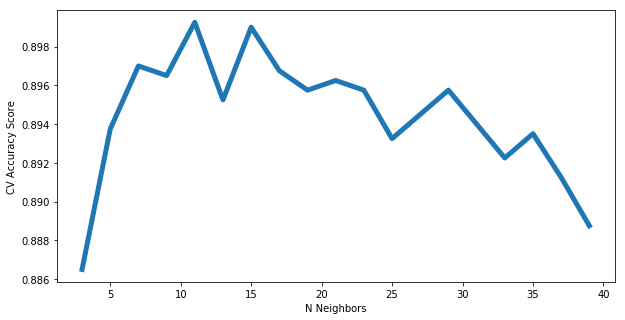

In [43]:
#KNN, finding n_neighbors
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

neighbors = range(3, 41, 2)

cv_scor = [ ]

for neighbor in neighbors:
    model = KNeighborsClassifier(n_neighbors=neighbor)
    cv_score = cross_val_score(model, 
                               X, 
                               y, 
                               cv = 5, 
                               scoring = "accuracy"
                              ).mean()
    cv_scor.append(cv_score)
    
plt.figure(figsize=(10,5))
plt.plot(neighbors, cv_scor, linewidth = 5)
plt.xlabel("N Neighbors")
plt.ylabel("CV Accuracy Score");

In [44]:
#n_neighbors sorted

lisk = list(zip(neighbors,cv_scor))
sorted(lisk, key=lambda x: x[1])

[(3, 0.88649454569460262),
 (39, 0.88874985624977543),
 (37, 0.89124861015407841),
 (33, 0.89224986249978522),
 (25, 0.89324767538699279),
 (35, 0.89350080039187563),
 (5, 0.89374299217655029),
 (31, 0.89400142617410339),
 (27, 0.89450017851590391),
 (13, 0.89524799140311162),
 (23, 0.89574986562478998),
 (19, 0.89575049218826908),
 (29, 0.8957508042981317),
 (21, 0.89624924218631585),
 (9, 0.89650268320731752),
 (17, 0.89675299453592905),
 (7, 0.89699862109159556),
 (15, 0.89899799687187021),
 (11, 0.89925080898563903)]

In [45]:
#fit the model with best n_neighbors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

knn2 = KNeighborsClassifier(n_neighbors=11)
knn2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [46]:
#accuracy score for KNN model with n_neighbors of 11.

preds = knn2.predict(X_test)
accuracy_score(y_test, preds)

0.89800000000000002

In [47]:
confusion_matrix(y_test, preds)

array([[618,  31],
       [ 71, 280]])

In [48]:
#Random Forest

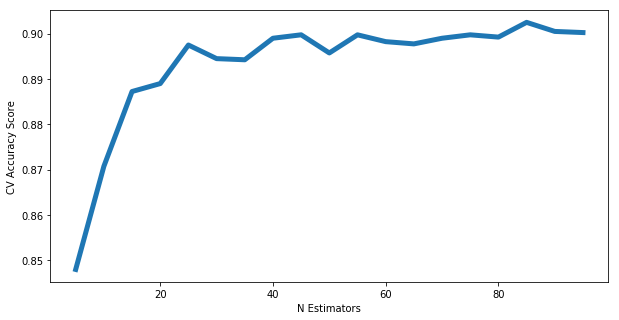

In [49]:
#Randfom Forest, finding n_estimators
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

ests = range(5, 100, 5)

cv_sco = [ ]

for est in ests:
    model = RandomForestClassifier(n_estimators=est)
    cv_score = cross_val_score(model, 
                               X, 
                               y, 
                               cv = 5, 
                               scoring = "accuracy"
                              ).mean()
    cv_sco.append(cv_score)
    
plt.figure(figsize=(10,5))
plt.plot(ests, cv_sco, linewidth = 5)
plt.xlabel("N Estimators")
plt.ylabel("CV Accuracy Score");

In [50]:
lisr = list(zip(ests,cv_sco))
sorted(lisr, key=lambda x: x[1])

[(5, 0.84799855546649305),
 (10, 0.87074264959789005),
 (15, 0.8872426730354267),
 (20, 0.88899392147487732),
 (35, 0.89424361561502441),
 (30, 0.89449705429227233),
 (50, 0.8957486203103443),
 (25, 0.89749455975712455),
 (65, 0.89774799843437258),
 (60, 0.89824424764726207),
 (70, 0.89899268631669749),
 (40, 0.89899456053837579),
 (80, 0.89924362342753672),
 (55, 0.89974550077422),
 (75, 0.89974643476005434),
 (45, 0.89975081211064389),
 (95, 0.90024518475810122),
 (90, 0.90049612655644784),
 (85, 0.90249706522978956)]

In [51]:
rf = RandomForestClassifier(n_estimators=85)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
sorted(zip(X.columns, rf.feature_importances_), key=lambda x: x[-1], reverse=True)

[('north_beach', 0.1209309487000597),
 ('richmond', 0.11929859077731249),
 ('glen_park', 0.1051928422881009),
 ('potrero', 0.092066159359072613),
 ('excelsior', 0.085219444104850731),
 ('mission', 0.076075357876027858),
 ('castro', 0.074337025724460312),
 ('haight', 0.072478855951003091),
 ('bernal', 0.071979033087075026),
 ('hayes_valley', 0.066352392740437),
 ('fillmore', 0.029742074906304924),
 ('soma', 0.029461328418037593),
 ('sunset', 0.02863036689568221),
 ('marina', 0.028235579171575688)]

In [53]:
preds = rf.predict(X_test)
accuracy_score(y_test, preds)

0.89100000000000001

In [54]:
confusion_matrix(y_test, preds)

array([[597,  52],
       [ 57, 294]])

## Section 3: Movie Revenue Prediction

Use the movie_metadata dataset to fit a regression model to predict gross. Use Linear, Polynomial, Ridge, Lasso regression. Use rMSE as your evaluation metric.

<br>

Once you've made the best possible model, I want you to pick three movies that are set to be released in January or February 2018 and use the model to predict how much revenue those movies will bring in.

In [55]:
movies = pd.read_csv("../data/movie_metadata.csv")

In [56]:
movies.set_index("movie_title",
                inplace = True)

movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [57]:
dcols = ['movie_imdb_link','director_name','actor_2_name','genres','actor_1_name','actor_3_name','plot_keywords','country','language']

movies.drop(dcols, axis = 1, inplace=True)

In [58]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, Avatar  to My Date with Drew 
Data columns (total 18 columns):
color                        5024 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
facenumber_in_poster         5030 non-null float64
num_user_for_reviews         5022 non-null float64
content_rating               4740 non-null object
budget                       4551 non-null float64
title_year                   4935 non-null float64
actor_2_facebook_likes       5030 non-null float64
imdb_score                   5043 non-null float64
aspect_ratio                 4714 non-null float64
movie_facebook_li

In [59]:
movies.isnull().sum()

color                         19
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        884
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [60]:
movies.dropna(inplace=True)

In [61]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3771 entries, Avatar  to My Date with Drew 
Data columns (total 18 columns):
color                        3771 non-null object
num_critic_for_reviews       3771 non-null float64
duration                     3771 non-null float64
director_facebook_likes      3771 non-null float64
actor_3_facebook_likes       3771 non-null float64
actor_1_facebook_likes       3771 non-null float64
gross                        3771 non-null float64
num_voted_users              3771 non-null int64
cast_total_facebook_likes    3771 non-null int64
facenumber_in_poster         3771 non-null float64
num_user_for_reviews         3771 non-null float64
content_rating               3771 non-null object
budget                       3771 non-null float64
title_year                   3771 non-null float64
actor_2_facebook_likes       3771 non-null float64
imdb_score                   3771 non-null float64
aspect_ratio                 3771 non-null float64
movie_facebook_li

In [62]:
movies.isnull().sum()

color                        0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [63]:
movies.columns

Index(['color', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [64]:
movies["content_rating"].unique()

array(['PG-13', 'PG', 'G', 'R', 'Approved', 'NC-17', 'X', 'Not Rated',
       'Unrated', 'M', 'GP', 'Passed'], dtype=object)

In [65]:
movies = pd.get_dummies(movies, columns=['color','content_rating'], drop_first=True)

In [66]:
movies.columns = movies.columns.str.lower()

In [67]:
movies.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'color_color', 'content_rating_g',
       'content_rating_gp', 'content_rating_m', 'content_rating_nc-17',
       'content_rating_not rated', 'content_rating_pg', 'content_rating_pg-13',
       'content_rating_passed', 'content_rating_r', 'content_rating_unrated',
       'content_rating_x'],
      dtype='object')

In [68]:
movies.corr().sort_values('gross', ascending=False)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_gp,content_rating_m,content_rating_nc-17,content_rating_not rated,content_rating_pg,content_rating_pg-13,content_rating_passed,content_rating_r,content_rating_unrated,content_rating_x
gross,0.465780,0.246391,0.138913,0.300363,0.145125,1.000000,0.625679,0.236732,-0.031522,0.545652,...,-0.001996,0.003327,-0.027242,-0.066856,0.148559,0.170017,-0.016634,-0.264644,-0.051971,-0.024777
num_voted_users,0.593456,0.339974,0.299992,0.268282,0.180598,0.625679,1.000000,0.250172,-0.031731,0.779319,...,-0.003343,0.000091,-0.016470,-0.047504,-0.054952,0.066837,-0.001032,-0.005524,-0.041226,-0.016093
num_user_for_reviews,0.564991,0.352021,0.217582,0.205994,0.123126,0.545652,0.779319,0.179951,-0.080375,1.000000,...,-0.002363,0.002517,-0.010764,-0.048421,-0.091631,0.101046,-0.007162,-0.000145,-0.040690,0.002396
num_critic_for_reviews,1.000000,0.229736,0.175791,0.253455,0.167578,0.465780,0.593456,0.238169,-0.033505,0.564991,...,-0.006173,-0.005653,-0.000802,-0.017049,-0.109362,0.105960,-0.017547,0.012294,-0.055305,0.001497
movie_facebook_likes,0.704383,0.215613,0.162173,0.271779,0.130752,0.367262,0.517885,0.206035,0.015231,0.370816,...,-0.007091,-0.010029,-0.009924,-0.015653,-0.050105,0.090201,-0.005866,-0.024807,-0.029788,-0.016692
actor_3_facebook_likes,0.253455,0.126164,0.117667,1.000000,0.252806,0.300363,0.268282,0.490083,0.106259,0.205994,...,-0.005117,-0.005453,-0.009333,-0.030592,0.005287,0.097715,-0.009268,-0.072908,-0.025733,-0.014685
actor_2_facebook_likes,0.254111,0.129373,0.116390,0.553958,0.391583,0.253593,0.245551,0.643251,0.073258,0.187888,...,-0.006598,-0.007997,-0.014009,-0.035639,-0.012889,0.059900,-0.011096,-0.014584,-0.030661,-0.018923
duration,0.229736,1.000000,0.180816,0.126164,0.084231,0.246391,0.339974,0.120827,0.026512,0.352021,...,0.007039,0.016064,-0.012742,-0.009614,-0.098725,0.064325,-0.009006,0.035319,-0.008746,-0.044262
cast_total_facebook_likes,0.238169,0.120827,0.118991,0.490083,0.944852,0.236732,0.250172,1.000000,0.080905,0.179951,...,-0.008857,-0.011484,-0.011072,-0.046553,-0.010971,0.079179,-0.015327,-0.030752,-0.042715,-0.005568
imdb_score,0.347848,0.367254,0.192116,0.065947,0.094007,0.215062,0.481637,0.107308,-0.066515,0.324879,...,0.003641,0.021493,-0.003664,0.045473,-0.066759,-0.133497,0.017875,0.148784,0.036522,0.003722


In [69]:
lm = smf.ols(formula="gross ~ num_voted_users + num_user_for_reviews + num_critic_for_reviews",
             data = movies
            ).fit()
lm.params

Intercept                 1.126380e+07
num_voted_users           2.130846e+02
num_user_for_reviews      1.957650e+04
num_critic_for_reviews    7.262365e+04
dtype: float64

In [70]:
lm.pvalues

Intercept                  5.625313e-14
num_voted_users           2.648247e-101
num_user_for_reviews       2.117767e-08
num_critic_for_reviews     1.162056e-15
dtype: float64

In [71]:
X = movies.drop("gross", axis = 1)
y = movies.gross

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.25
                                                   )

In [73]:
lr = LinearRegression()
lr.fit(X_train, y_train)

train_score = lr.score(X_train, y_train)
print(train_score)

test_score = lr.score(X_test, y_test)
print(test_score)

0.535858897113
0.581348687784


In [74]:
feature_cols = ['num_voted_users', 'num_user_for_reviews', 
                'num_critic_for_reviews','movie_facebook_likes',
                'content_rating_r', 'actor_3_facebook_likes',
                'actor_2_facebook_likes','duration']
X = movies[feature_cols]

In [75]:
def cross_val_rmse(X, y):
    linreg = LinearRegression()
    scores = cross_val_score(linreg, X, y, cv=5, scoring='mean_squared_error')
    return np.sqrt(abs(scores)).mean()

In [76]:
cross_val_rmse(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

51911721.967279799

In [77]:
X = movies.drop("gross", axis = 1)
y = movies.gross

In [78]:
lr.fit(X,y)
print(lr.score(X,y) ,cross_val_rmse(X,y))

0.54944436571 51194558.8989


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

In [79]:
ridge = Ridge(alpha=100)
ridge.fit(X,y)
print(ridge.score(X,y), cross_val_rmse(X,y))

0.544750425354 51194558.8989


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

In [80]:
lasso = Lasso(alpha=1)
lasso.fit(X,y)
print(lasso.score(X,y), cross_val_rmse(X,y))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/

0.54943046832 51194558.8989


In [81]:
poly = PolynomialFeatures(degree=2)
Xp = poly.fit_transform(X)

In [82]:
rid = Ridge(alpha=1500000)
rid.fit(Xp,y)
print(rid.score(Xp,y), cross_val_rmse(Xp,y))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


0.7713417865 84574738.2986


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


## Bonus!!

<br>

Code a K-Nearest Neighbors model from scratch using just python, that means no external libraries such as numpy. This may seem daunting but it's a lot easier than you think. Hint: Use a Class to create the algorithm.